In [3]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import pickle

In [4]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Data Preprocessing

In [5]:
# Normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [14]:
# Print shapes of training and testing data
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing data shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 1)


In [6]:
# Class labels for CIFAR-10
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#Exploratory Data Analysis

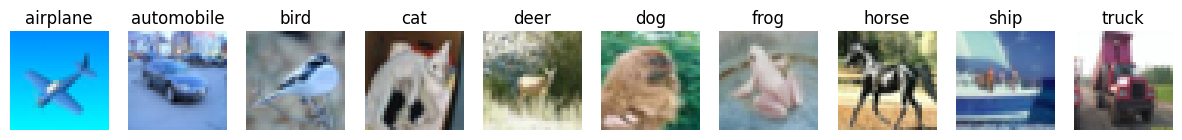

In [7]:
# Plot sample images from each class
def plot_sample_images(images, labels, class_names):
    fig, axes = plt.subplots(1, len(class_names), figsize=(15, 2))
    for i, ax in enumerate(axes):
        class_indices = np.where(labels == i)[0]
        random_index = np.random.choice(class_indices)
        ax.imshow(images[random_index])
        ax.set_title(class_names[i])
        ax.axis('off')
    plt.show()

plot_sample_images(x_train, y_train, cifar10_labels)

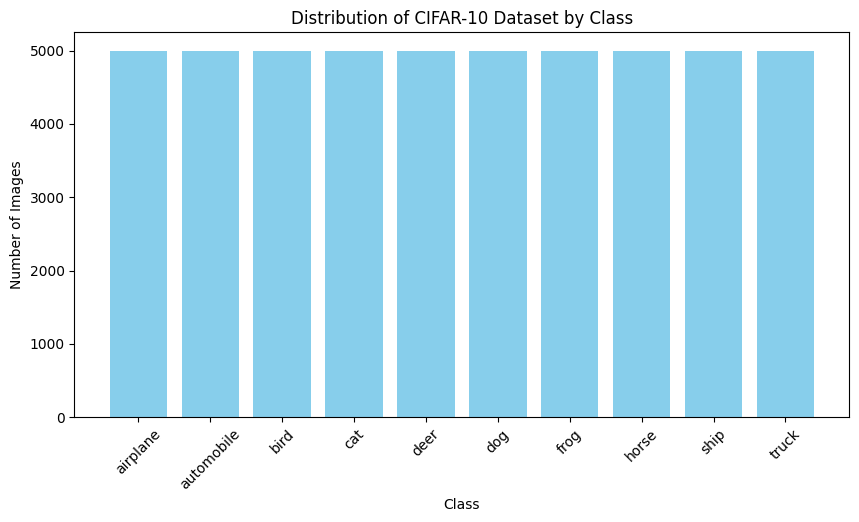

In [8]:
# Distribution of the dataset by class
class_counts = np.bincount(y_train.flatten())
plt.figure(figsize=(10, 5))
plt.bar(cifar10_labels, class_counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of CIFAR-10 Dataset by Class')
plt.xticks(rotation=45)
plt.show()

# Model Building

In [9]:
model = Sequential()

# Step 1: Convolutional Layer with ReLU activation function and Pooling
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2, strides=2))

# Step 2: Convolutional Layer with ReLU activation function and Pooling
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2, strides=2))

# Step 3: Convolutional Layer with ReLU activation function and Pooling
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2, strides=2))

# Step 4: Flattening the pooled feature map
model.add(Flatten())

# Step 5: Fully Connected Layer (1 Hidden Layer)
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.3))

# Step 6: Output Layer
model.add(Dense(units=10, activation='softmax'))

In [10]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 64)        256       
 chNormalization)                                                
                                                        

#Training the model

In [13]:
# Train the model
Train_CNN = model.fit(x_train, y_train, epochs=22, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/22
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4238 - accuracy: 0.4987 - val_loss: 1.6325 - val_accuracy: 0.4629
Epoch 2/22
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0539 - accuracy: 0.6291 - val_loss: 1.3069 - val_accuracy: 0.5466
Epoch 3/22
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9048 - accuracy: 0.6855 - val_loss: 1.0784 - val_accuracy: 0.6357
Epoch 4/22
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7956 - accuracy: 0.7242 - val_loss: 0.8103 - val_accuracy: 0.7254
Epoch 5/22
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7311 - accuracy: 0.7467 - val_loss: 1.0445 - val_accuracy: 0.6480
Epoch 6/22
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6672 - accuracy: 0.7684 - val_loss: 0.8322 - val_accuracy: 0.7155
Epoch 7/22
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6146 - accuracy: 0.7857 - val_loss: 0.9066 - val_accuracy

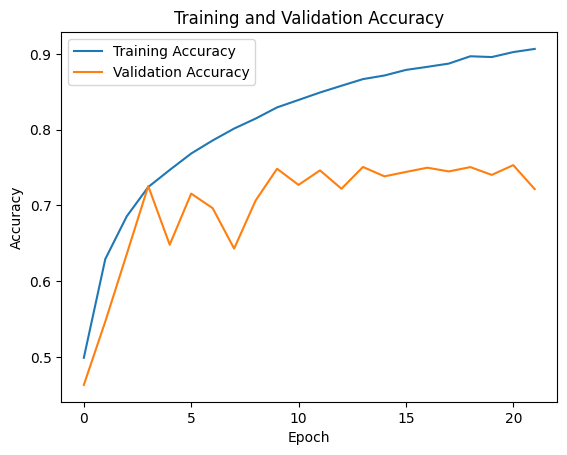

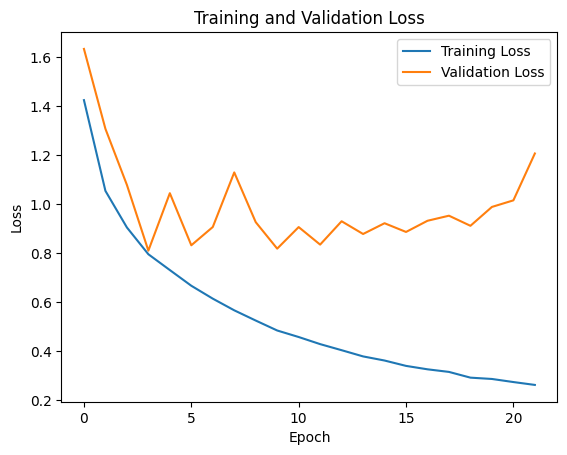

In [15]:
# Plot training and validation accuracy
plt.plot(Train_CNN.history['accuracy'], label='Training Accuracy')
plt.plot(Train_CNN.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(Train_CNN.history['loss'], label='Training Loss')
plt.plot(Train_CNN.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluation of Model

In [19]:
# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(x_train, y_train)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Print the training and test loss and accuracy
print(f"Train Loss: {train_loss}, Train Accuracy: {train_accuracy}")
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


313/313 [==============================] - 1s 3ms/step - loss: 1.2063 - accuracy: 0.7214
Train Loss: 0.285915732383728, Train Accuracy: 0.9045400023460388
Test Loss: 1.2063108682632446, Test Accuracy: 0.7214000225067139


* We can see that Train Accuracy is too high as compared to Test accuracy, which means our model is overfitting.

* Lets try building another model with L2 regularization

In [34]:
from tensorflow.keras.regularizers import l2

In [29]:
# Build the model architecture with L2 regularization
model_regularized = Sequential()

model_regularized.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(32, 32, 3), kernel_regularizer=l2(0.001)))
model_regularized.add(BatchNormalization())
model_regularized.add(MaxPooling2D(pool_size=2))

model_regularized.add(Conv2D(filters=64, kernel_size=3, activation='relu', kernel_regularizer=l2(0.001)))
model_regularized.add(BatchNormalization())
model_regularized.add(MaxPooling2D(pool_size=2))

model_regularized.add(Conv2D(filters=128, kernel_size=3, activation='relu', kernel_regularizer=l2(0.001)))
model_regularized.add(BatchNormalization())
model_regularized.add(MaxPooling2D(pool_size=2))

model_regularized.add(Flatten())

model_regularized.add(Dense(units=128, activation='relu', kernel_regularizer=l2(0.001)))
model_regularized.add(Dropout(0.5))

model_regularized.add(Dense(units=10, activation='softmax'))

In [30]:
# Compile the model
model_regularized.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
# Train the model
history = model_regularized.fit(x_train, y_train, epochs=22, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/22
1563/1563 [==============================] - 12s 7ms/step - loss: 1.8972 - accuracy: 0.4397 - val_loss: 2.1509 - val_accuracy: 0.4183
Epoch 2/22
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4636 - accuracy: 0.5780 - val_loss: 1.3683 - val_accuracy: 0.6042
Epoch 3/22
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3016 - accuracy: 0.6349 - val_loss: 1.5948 - val_accuracy: 0.5560
Epoch 4/22
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2275 - accuracy: 0.6656 - val_loss: 1.1759 - val_accuracy: 0.6808
Epoch 5/22
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1809 - accuracy: 0.6899 - val_loss: 1.5311 - val_accuracy: 0.5827
Epoch 6/22
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1413 - accuracy: 0.7082 - val_loss: 1.3374 - val_accuracy: 0.6366
Epoch 7/22
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1133 - accuracy: 0.7213 - val_loss: 1.1943 - val_accuracy

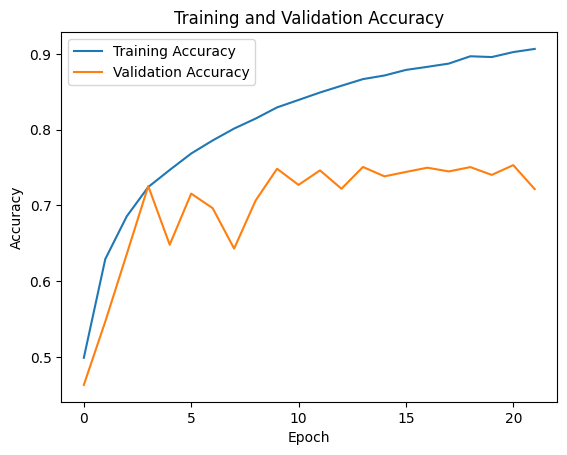

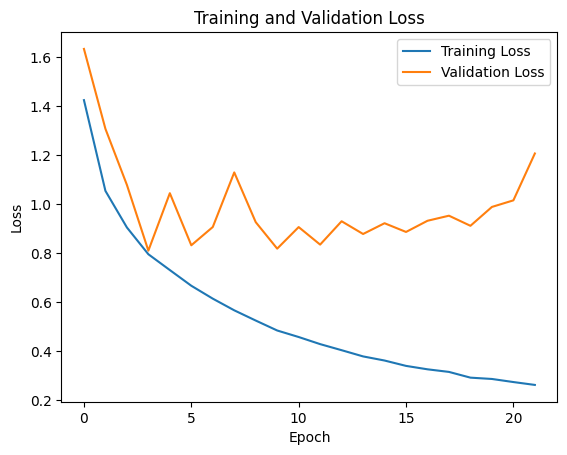

In [32]:
# Plot training and validation accuracy
plt.plot(Train_CNN.history['accuracy'], label='Training Accuracy')
plt.plot(Train_CNN.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(Train_CNN.history['loss'], label='Training Loss')
plt.plot(Train_CNN.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
# Evaluate the model on the training set
train_loss, train_accuracy = model_regularized.evaluate(x_train, y_train)

# Evaluate the model on the test set
test_loss, test_accuracy = model_regularized.evaluate(x_test, y_test)

# Print the training and test loss and accuracy
print(f"Train Loss: {train_loss}, Train Accuracy: {train_accuracy}")
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 1.1489 - accuracy: 0.7358
Train Loss: 0.9112902283668518, Train Accuracy: 0.800599992275238
Test Loss: 1.1488693952560425, Test Accuracy: 0.73580002784729


* Calculate accuracy per class


In [41]:
# Save the model as a pickle file
with open('cnn_model-imageclassifier.pkl', 'wb') as f:
    pickle.dump(model, f)

In [35]:
from sklearn.metrics import accuracy_score

In [38]:
# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Predict probabilities for each class for test data
y_pred_prob = model_regularized.predict(x_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate accuracy per class
class_accuracy = {}
for class_index, class_name in enumerate(class_names):
    # Indices of examples in the test set belonging to the current class
    class_indices = np.where(y_test == class_index)[0]

    # Predicted labels for examples of the current class
    class_predictions = y_pred[class_indices]

    # True labels for examples of the current class
    class_true_labels = y_test[class_indices]

    # Calculate accuracy for the current class
    class_acc = accuracy_score(class_true_labels, class_predictions)

    # Store accuracy for the current class
    class_accuracy[class_name] = class_acc

# Print accuracy per class
for class_name, acc in class_accuracy.items():
    print(f"Class {class_name}: Accuracy = {acc:.2f}")


313/313 [==============================] - 1s 2ms/step
Class airplane: Accuracy = 0.73
Class automobile: Accuracy = 0.86
Class bird: Accuracy = 0.65
Class cat: Accuracy = 0.47
Class deer: Accuracy = 0.76
Class dog: Accuracy = 0.52
Class frog: Accuracy = 0.88
Class horse: Accuracy = 0.70
Class ship: Accuracy = 0.91
Class truck: Accuracy = 0.87


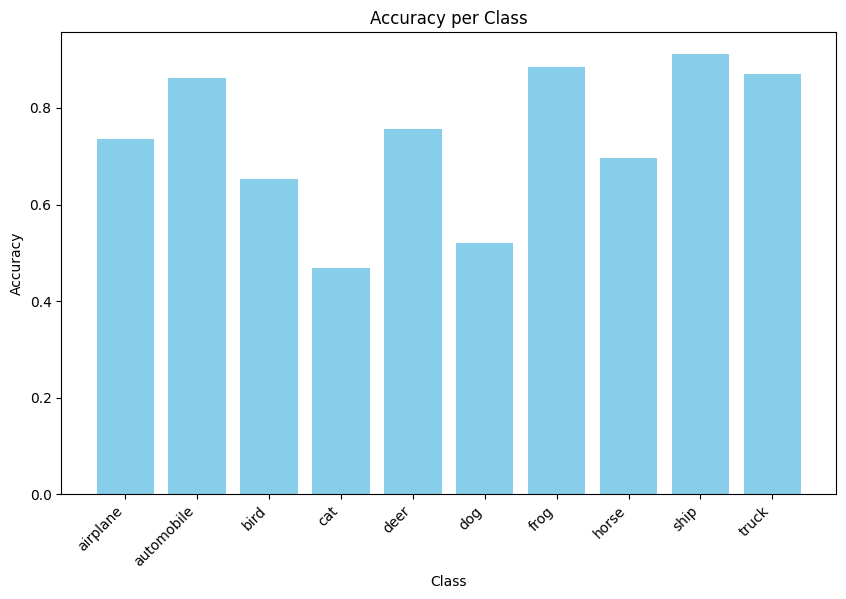

In [39]:
# Convert class_accuracy dictionary to lists for plotting
class_names = list(class_accuracy.keys())
class_accuracies = list(class_accuracy.values())

# Plot accuracy per class
plt.figure(figsize=(10, 6))
plt.bar(class_names, class_accuracies, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.title('Accuracy per Class')
plt.xticks(rotation=45, ha='right')
plt.show()

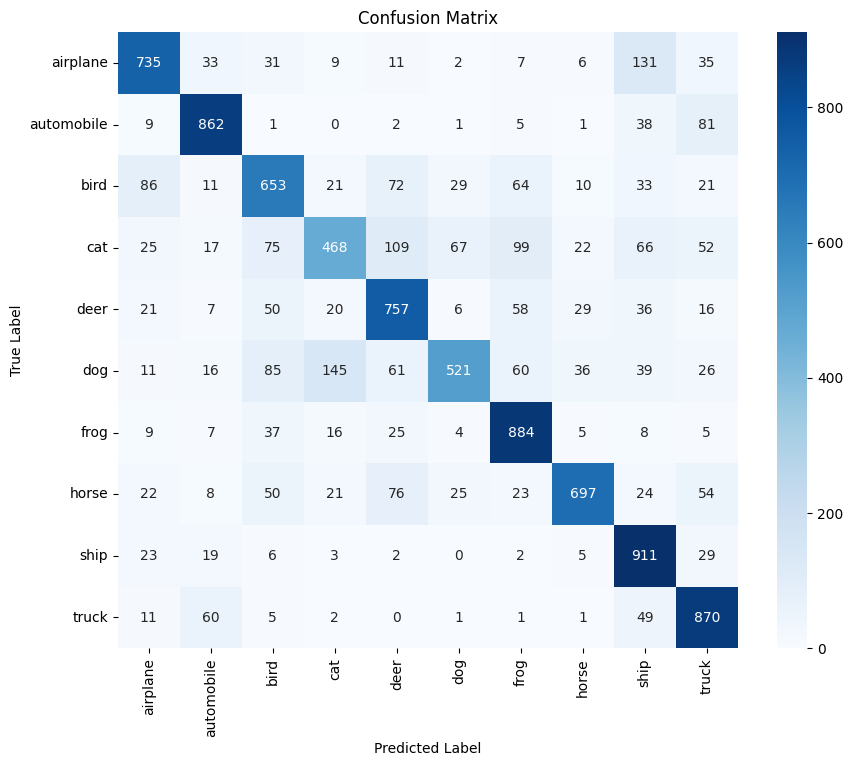

In [42]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Result Interpretation:

The CNN model trained on the CIFAR-10 dataset achieved an overall test accuracy of 73%.
Accuracy per class varied, with some classes exhibiting higher accuracy than others, as depicted by the confusion matrix.

# Recommendations:

* To mitigate overfitting observed during training, consider adjusting dropout rates or applying stronger regularization techniques in the CNN architecture.
* Improve accuracy for classes with lower performance, such as 'cat' or 'dog', by exploring class-specific data augmentation strategies or fine-tuning model parameters.